In [15]:
import albumentations as A
import numpy as np
from PIL import Image, ImageDraw

In [16]:
markups_file = "aflw__face_39858.pts"
img_file = "aflw__face_39858.jpg"

In [17]:
postition_map = {i: 16 - i for i in range(17)}
postition_map.update(
    {17+i:26 - i for i in range(10)}
)
postition_map.update(
    {i:i for i in range(27, 31)}
)
postition_map.update(
    {31 + i:35 - i for i in range(5)}
)
postition_map.update(
    {31 + i:35 - i for i in range(5)}
)
postition_map.update(
    {
        36: 45,
        37: 44,
        38: 43,
        39: 42,
        40: 47,
        41: 46,
        42: 39,
        43: 38,
        44: 37,
        45: 36,
        46: 41,
        47: 40
    }
)
postition_map.update(
    {
        48: 54,
        49: 53,
        50: 52,
        51: 51,
        52: 50,
        53: 49,
        54: 48,
        55: 59,
        56: 58,
        57: 57,
        58: 56,
        59: 55,
        60: 64,
        61: 63,
        62: 62,
        63: 61,
        64: 60,
        65: 67,
        66: 66,
        67: 65
    }
)

postition_map

{0: 16,
 1: 15,
 2: 14,
 3: 13,
 4: 12,
 5: 11,
 6: 10,
 7: 9,
 8: 8,
 9: 7,
 10: 6,
 11: 5,
 12: 4,
 13: 3,
 14: 2,
 15: 1,
 16: 0,
 17: 26,
 18: 25,
 19: 24,
 20: 23,
 21: 22,
 22: 21,
 23: 20,
 24: 19,
 25: 18,
 26: 17,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 35,
 32: 34,
 33: 33,
 34: 32,
 35: 31,
 36: 45,
 37: 44,
 38: 43,
 39: 42,
 40: 47,
 41: 46,
 42: 39,
 43: 38,
 44: 37,
 45: 36,
 46: 41,
 47: 40,
 48: 54,
 49: 53,
 50: 52,
 51: 51,
 52: 50,
 53: 49,
 54: 48,
 55: 59,
 56: 58,
 57: 57,
 58: 56,
 59: 55,
 60: 64,
 61: 63,
 62: 62,
 63: 61,
 64: 60,
 65: 67,
 66: 66,
 67: 65}

In [18]:
postition = np.array(sorted(list(postition_map.items()), key=lambda x: x[0]))[:, 1]
postition

array([16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,
       26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 27, 28, 29, 30, 35, 34, 33,
       32, 31, 45, 44, 43, 42, 47, 46, 39, 38, 37, 36, 41, 40, 54, 53, 52,
       51, 50, 49, 48, 59, 58, 57, 56, 55, 64, 63, 62, 61, 60, 67, 66, 65])

# Оригинальная картинка

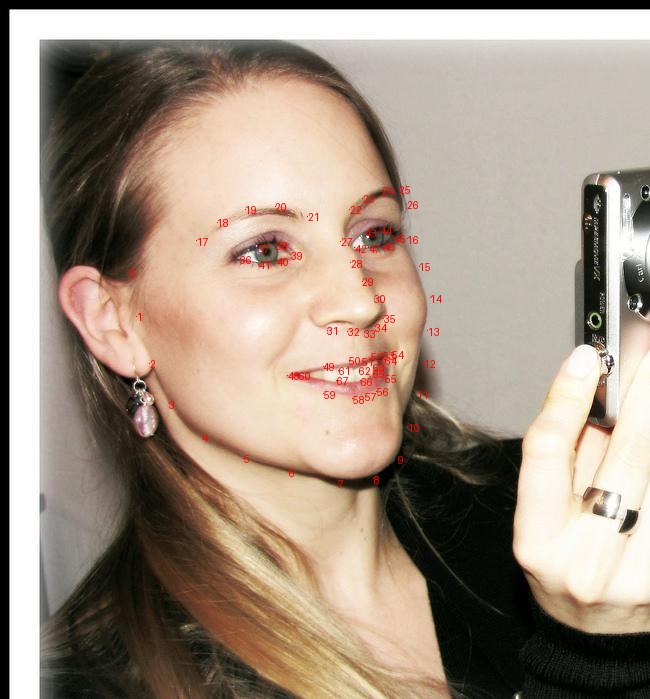

In [19]:
img_p = Image.open(img_file)
markup = np.loadtxt(markups_file, comments=("version:", "n_points:", "{", "}"))
img_d = ImageDraw.Draw(img_p)
for i, (x, y) in enumerate(markup.tolist()):
    img_d.point([(x, y)], fill=(255, 0, 0))
    img_d.text((x, y-5), f"{i}", fill=(255, 0, 0))
img_p.show()

# Горизонтальный флип

In [20]:
transforms_hor = A.Compose(
            [
                # A.VerticalFlip(p=0.5),
                A.HorizontalFlip(always_apply=True),
            ],
            keypoint_params=A.KeypointParams(format='xy', label_fields=["class_labels"], remove_invisible=False),
        )

In [21]:
markup = np.loadtxt(markups_file, comments=("version:", "n_points:", "{", "}"))
img = np.array(Image.open(img_file).convert("RGB"))
class_labels = list(range(68))


t_data = transforms_hor(image=img, keypoints=markup, class_labels=class_labels)

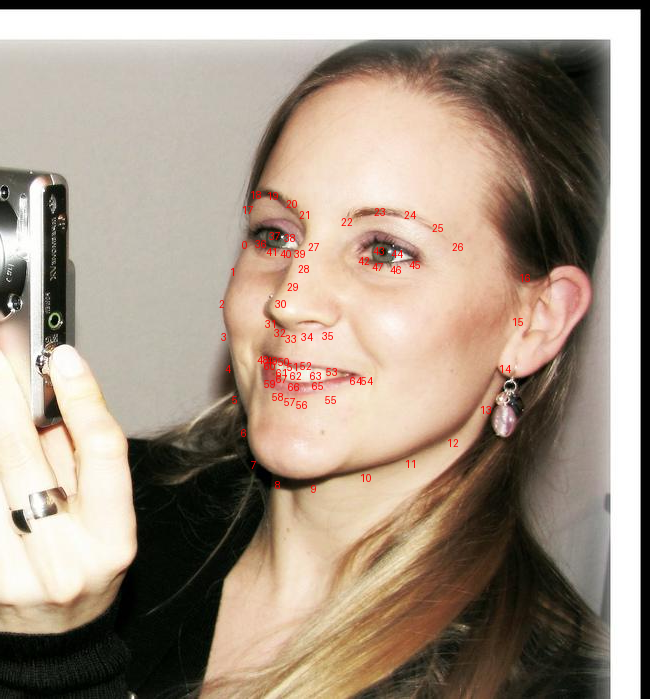

In [22]:
img_p = Image.fromarray(t_data["image"])
img_d = ImageDraw.Draw(img_p)
for i, (x, y) in enumerate([t_data["keypoints"][i] for i in postition]):
    # img_d.point([(x, y)], fill=(255, 0, 0))
    img_d.text((x, y), f"{i}", fill=(255, 0, 0))
img_p.show()

# Вертикальный флип

In [23]:
transforms_vert = A.Compose(
            [
                A.VerticalFlip(always_apply=True),
                # A.HorizontalFlip(p=0.5),
            ],
            keypoint_params=A.KeypointParams(format='xy', label_fields=["class_labels"], remove_invisible=False),
        )

In [24]:
markup = np.loadtxt(markups_file, comments=("version:", "n_points:", "{", "}"))
img = np.array(Image.open(img_file).convert("RGB"))
class_labels = list(range(68))


t_data = transforms_vert(image=img, keypoints=markup, class_labels=class_labels)

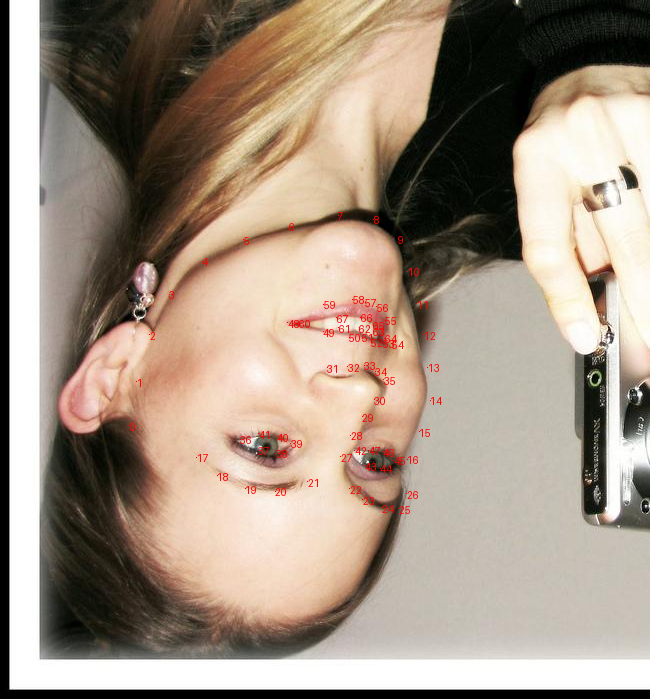

In [25]:
img_p = Image.fromarray(t_data["image"])
img_d = ImageDraw.Draw(img_p)
for i, (x, y) in enumerate(t_data["keypoints"]):
    img_d.point([(x, y)], fill=(255, 0, 0))
    img_d.text((x, y-5), f"{i}", fill=(255, 0, 0))
img_p.show()

# Два флипа

In [26]:
transforms = A.Compose(
            [
                A.VerticalFlip(always_apply=True),
                A.HorizontalFlip(always_apply=True),
            ],
            keypoint_params=A.KeypointParams(format='xy', label_fields=["class_labels"], remove_invisible=False),
        )

In [27]:
markup = np.loadtxt(markups_file, comments=("version:", "n_points:", "{", "}"))
img = np.array(Image.open(img_file).convert("RGB"))
class_labels = list(range(68))


t_data = transforms(image=img, keypoints=markup, class_labels=class_labels)

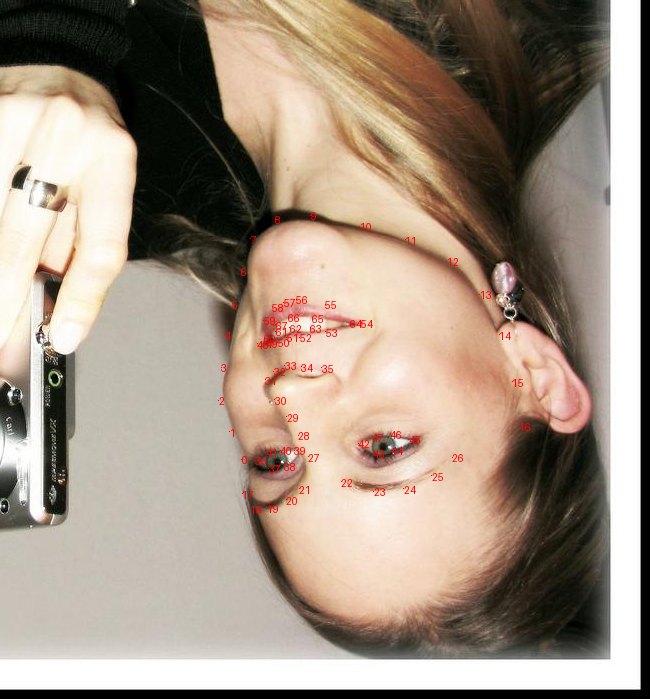

In [28]:
img_p = Image.fromarray(t_data["image"])
img_d = ImageDraw.Draw(img_p)
for i, (x, y) in enumerate([t_data["keypoints"][i] for i in postition]):
    img_d.point([(x, y)], fill=(255, 0, 0))
    img_d.text((x, y-5), f"{i}", fill=(255, 0, 0))
img_p.show()